In [1]:
import numpy as np
from utils.ifa_meander_project.meander_function_version2 import *

In [2]:
mesh_name = "ifa_meander_2.msh"
save_mesh_folder = 'data/gmsh_files/'
ifa_meander_mat = 'data/antennas_mesh/ifa_meander_2.mat'
ifa_meander_msh = save_mesh_folder + mesh_name

In [3]:
fC      = 868e6
fLow    = 820e6
fHigh   = 940e6

""" fC      = 868e6
fLow    = 796e6
fHigh   = 964e6 """
nPoints = calculate_nPoints(fLow, fHigh, fC)
accuracy= 0.01
print(f"nPoints = {nPoints}")

nPoints = 6


In [4]:
frequencies = np.linspace(fLow, fHigh, nPoints)
print("Liste des frequences : ")
count = 1
for frequency in frequencies:
    print(f"Simulation Numéro {count} = {frequency / 1e6:.2f} MHz")
    count += 1

Liste des frequences : 
Simulation Numéro 1 = 820.00 MHz
Simulation Numéro 2 = 844.00 MHz
Simulation Numéro 3 = 868.00 MHz
Simulation Numéro 4 = 892.00 MHz
Simulation Numéro 5 = 916.00 MHz
Simulation Numéro 6 = 940.00 MHz


In [5]:
vitesse_lumiere = 3.0e8  # en mètres par seconde (m/s)
longueur_onde = vitesse_lumiere / fC 
quart_d_onde = longueur_onde / 4

print(f"Pour la fréquence de raisonnance {fC} Hz :")
print(f"Longueur d'onde (λ) = {longueur_onde} m")
print(f"Quart d'onde (λ/4) = {quart_d_onde} m")

Pour la fréquence de raisonnance 868000000.0 Hz :
Longueur d'onde (λ) = 0.3456221198156682 m
Quart d'onde (λ/4) = 0.08640552995391705 m


In [6]:
# Terminal size 
t_a = 50 / 1000   # Hauteur
a = 15 / 1000 
t_b = 30 / 1000  # Largeur
b = t_b
x_t = np.array([-t_a, 0, 0, -t_a])
y_t = np.array([t_b/2, t_b/2, -t_b/2, -t_b/2])

In [ ]:
# Génération des points du contour IFA
# wid has to be less than min_slot       
# wid = 1.075 / 1000    # Largeur des branches

wid = 1 / 1000    # Largeur des branches

L_short = 1.15 / 1000
Lenght_antenna = quart_d_onde

# feed_wid = 1 / 1000
feed_wid = wid

# distance_short = t_b/2
distance_short = 1 / 1000 + wid
# distance_short = 7.77 / 1000

feed = t_b/2 - distance_short

# feed_point = [0, t_b/2 - wid/2, 0]
feed_point = [0, feed, 0]

x, y = ifa_creation_new(Lenght_antenna, a, b, wid, L_short)
x_m, y_m = trace_meander_new(x, y, wid)
feed_x = np.array([0, L_short-wid/2, L_short-wid/2, 0])
feed_y = np.array([feed + feed_wid/2, feed + feed_wid/2, feed -feed_wid/2, feed -feed_wid/2])
antenna_ifa_meander(x_m, y_m, x_t, y_t, feed_x, feed_y, save_mesh_folder, mesh_name, 2.25/1000)

extract_msh_to_mat(ifa_meander_msh, ifa_meander_mat)
s11_db, f_resonance, has_converged = simulate_freq_loop(fLow, fHigh, nPoints, fC, accuracy, ifa_meander_mat, feed_point)
plot_s11_curve(fLow, fHigh, nPoints, s11_db, fC)


In [8]:
def run_ifa_meander_simulation(iteration, wid, distance_short, x, y, L_short, feed, feed_wid, x_t, y_t, save_mesh_folder, mesh_name, ifa_meander_msh, ifa_meander_mat):
    # Affiche l'iteration
    print(f"\nIteration {iteration + 1}\n")
    print(f"wid = {wid * 1000}")
    print(f"short feed = {distance_short * 1000}\n")
    # x, y = ifa_creation_optimisation(Lenght_antenna, a, b, wid, Nombre_meandre, L_short)
    x_m, y_m = trace_meander_new(x, y, wid)
    feed_x = np.array([0, L_short-wid/2, L_short-wid/2, 0])
    feed_y = np.array([feed + feed_wid/2, feed + feed_wid/2, feed -feed_wid/2, feed -feed_wid/2])
    antenna_ifa_meander(x_m, y_m, x_t, y_t, feed_x, feed_y, save_mesh_folder, mesh_name, 2.25/1000)
    extract_msh_to_mat(ifa_meander_msh, ifa_meander_mat)


def update_ifa_meander_params(new_distance_short, new_wid, new_Nombre_meandre, t_b):
    distance_short = new_distance_short
    wid = new_wid
    feed = t_b/2 - distance_short
    feed_wid = wid
    feed_point = [0, feed, 0]
    # Si new_Nombre_meandre est None ou non fourni, ne pas le retourner
    if new_Nombre_meandre is not None:
        return distance_short, wid, new_Nombre_meandre, feed, feed_wid, feed_point
    else:
        return distance_short, wid, feed, feed_wid, feed_point


Number of meanders 2
distance meandres 0.006925

Iteration 1

wid = 1.0
short feed = 7.77

Simulation 1/6 | f = 820.00 MHz | S11 = -0.06 dB
Simulation 2/6 | f = 844.00 MHz | S11 = -0.09 dB


Simulation 3/6 | f = 868.00 MHz | S11 = -0.13 dB
Simulation 4/6 | f = 892.00 MHz | S11 = -0.19 dB
Simulation 5/6 | f = 916.00 MHz | S11 = -0.28 dB
Simulation 6/6 | f = 940.00 MHz | S11 = -0.43 dB

📡 Résultats de simulation :
→ Fréquence de résonance = 940.00 MHz
→ Impédance à f_res      = 2.54+50.70j Ω

❌ Pas de convergence —> Réajustement des paramètres...

📉 Fréquence trop haute —> + méandres
🔧 Nouveaux paramètres :
• Distance short-feed : 6.59 mm
• Largeur de piste    : 1.20 mm
• Nombre de méandres  : 3



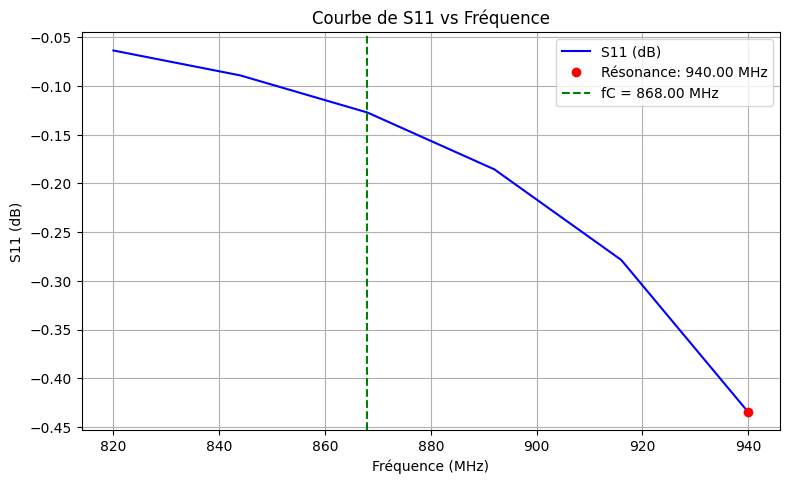

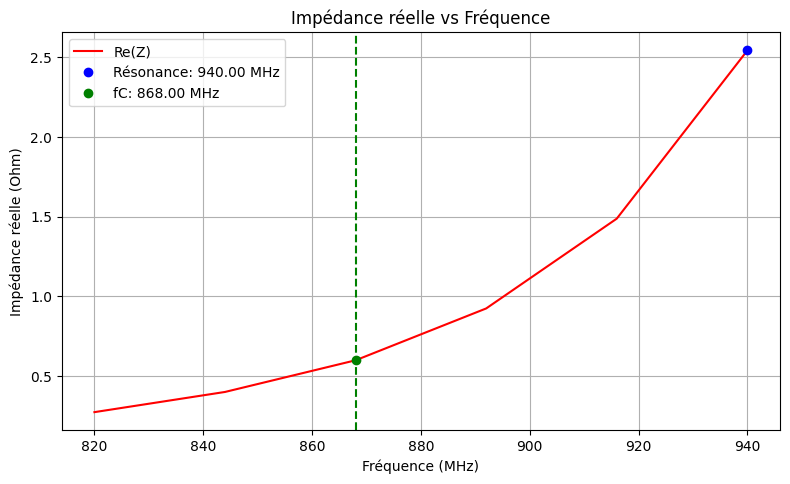

Number of meanders 3
distance meandres 0.0046166666666666665

Iteration 2

wid = 1.2
short feed = 6.585451258559635

Simulation 1/6 | f = 820.00 MHz | S11 = -0.08 dB
Simulation 2/6 | f = 844.00 MHz | S11 = -0.12 dB


Simulation 3/6 | f = 868.00 MHz | S11 = -0.19 dB
Simulation 4/6 | f = 892.00 MHz | S11 = -0.34 dB
Simulation 5/6 | f = 916.00 MHz | S11 = -0.66 dB
Simulation 6/6 | f = 940.00 MHz | S11 = -1.50 dB

📡 Résultats de simulation :
→ Fréquence de résonance = 940.00 MHz
→ Impédance à f_res      = 8.23+47.55j Ω

❌ Pas de convergence —> Réajustement des paramètres...

📉 Fréquence trop haute —> + méandres
🔧 Nouveaux paramètres :
• Distance short-feed : 5.58 mm
• Largeur de piste    : 1.44 mm
• Nombre de méandres  : 4



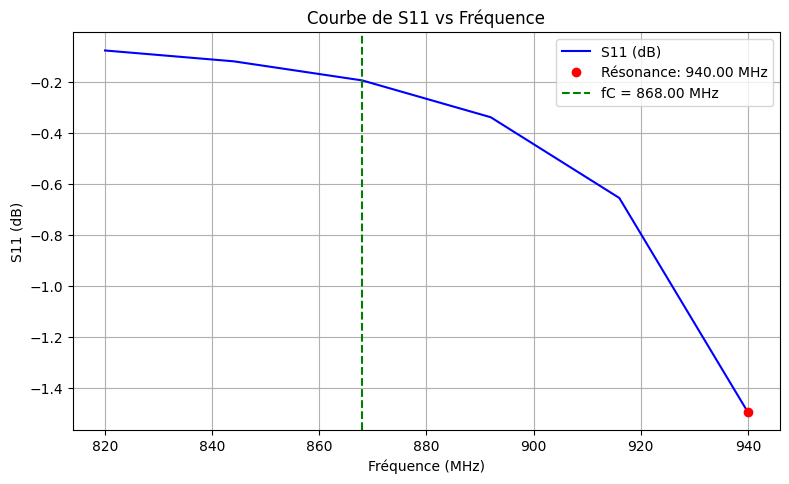

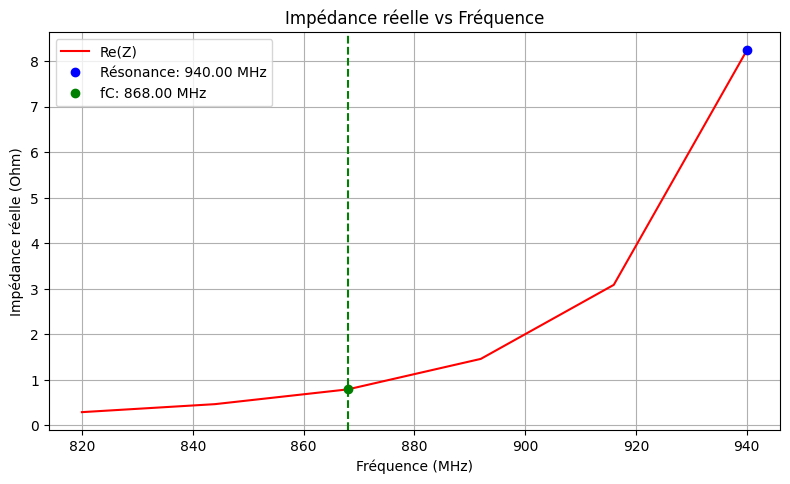

Number of meanders 4
distance meandres 0.0034625

Iteration 3

wid = 1.44
short feed = 5.581488838978723

Simulation 1/6 | f = 820.00 MHz | S11 = -0.06 dB
Simulation 2/6 | f = 844.00 MHz | S11 = -0.09 dB


Simulation 3/6 | f = 868.00 MHz | S11 = -0.16 dB
Simulation 4/6 | f = 892.00 MHz | S11 = -0.31 dB
Simulation 5/6 | f = 916.00 MHz | S11 = -0.69 dB
Simulation 6/6 | f = 940.00 MHz | S11 = -2.07 dB

📡 Résultats de simulation :
→ Fréquence de résonance = 940.00 MHz
→ Impédance à f_res      = 9.17+36.62j Ω

❌ Pas de convergence —> Réajustement des paramètres...

📉 Fréquence trop haute —> + méandres
🔧 Nouveaux paramètres :
• Distance short-feed : 4.73 mm
• Largeur de piste    : 1.73 mm
• Nombre de méandres  : 5



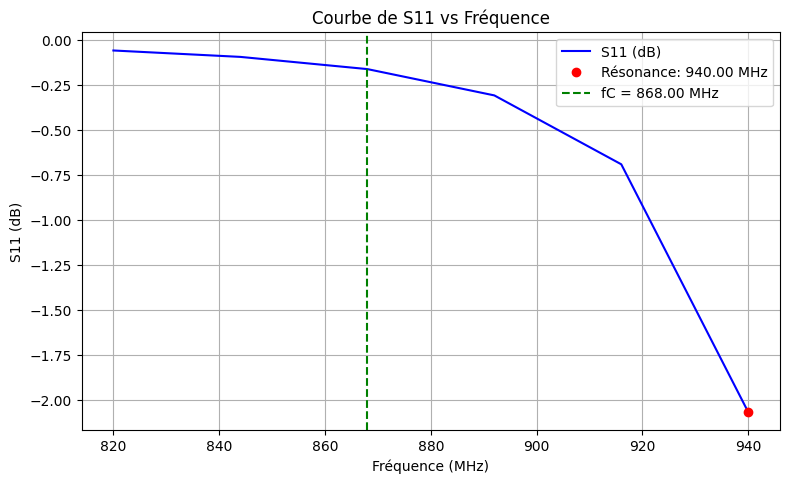

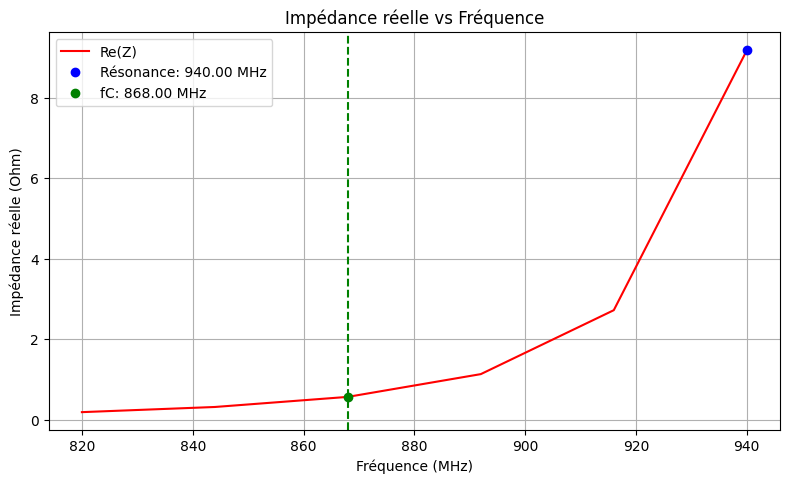

Number of meanders 5
distance meandres 0.00277

Iteration 4

wid = 1.7279999999999998
short feed = 4.730582071980565

Simulation 1/6 | f = 820.00 MHz | S11 = -0.02 dB
Simulation 2/6 | f = 844.00 MHz | S11 = -0.03 dB


Simulation 3/6 | f = 868.00 MHz | S11 = -0.05 dB
Simulation 4/6 | f = 892.00 MHz | S11 = -0.09 dB
Simulation 5/6 | f = 916.00 MHz | S11 = -0.16 dB
Simulation 6/6 | f = 940.00 MHz | S11 = -0.33 dB

📡 Résultats de simulation :
→ Fréquence de résonance = 940.00 MHz
→ Impédance à f_res      = 1.11+20.10j Ω

❌ Pas de convergence —> Réajustement des paramètres...

📉 Fréquence trop haute —> + méandres
🔧 Nouveaux paramètres :
• Distance short-feed : 4.10 mm
• Largeur de piste    : 2.07 mm
• Nombre de méandres  : 5



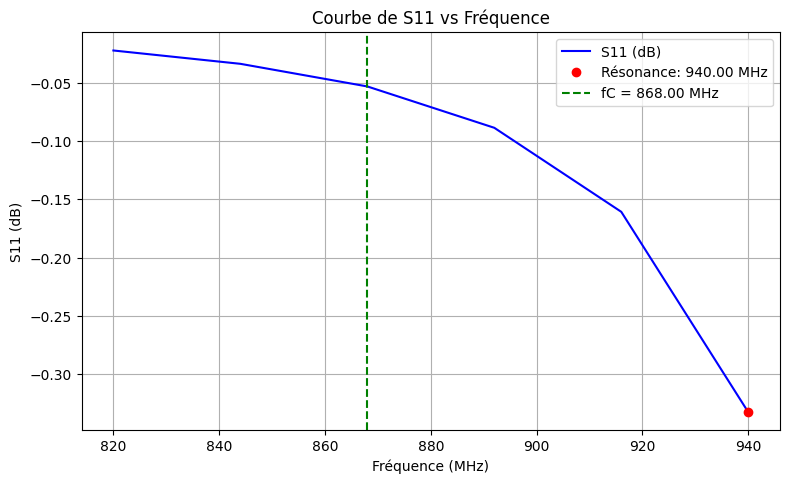

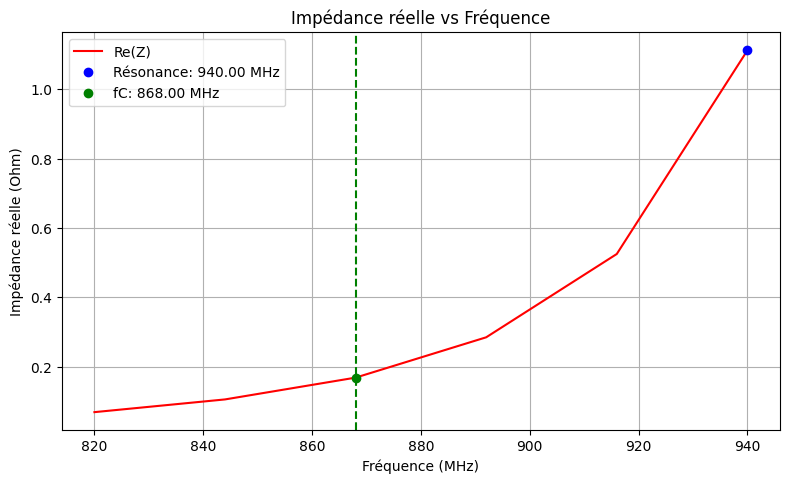

Number of meanders 5
distance meandres 0.00277

Iteration 5

wid = 2.0735999999999994
short feed = 4.096709954685274

Simulation 1/6 | f = 820.00 MHz | S11 = -0.01 dB
Simulation 2/6 | f = 844.00 MHz | S11 = -0.01 dB


Simulation 3/6 | f = 868.00 MHz | S11 = -0.01 dB
Simulation 4/6 | f = 892.00 MHz | S11 = -0.02 dB
Simulation 5/6 | f = 916.00 MHz | S11 = -0.02 dB


In [ ]:
has_converged = False
max_iterations = 15

x, y, Nombre_meandre = ifa_creation_new(Lenght_antenna, a, b, wid, L_short)

# Nombre_meandre = 6

# Loop for simulation
iteration = 0
while not has_converged and iteration < max_iterations:

    run_ifa_meander_simulation(iteration, wid, distance_short, x, y, L_short, feed, feed_wid, x_t, y_t, save_mesh_folder, mesh_name, ifa_meander_msh, ifa_meander_mat)

    s11_db, f_resonance, new_distance_short, new_wid, new_Nombre_meandre, has_converged, impedances = simulate_freq_loop_test_version_3(
        fLow, fHigh, nPoints, fC, accuracy, ifa_meander_mat, feed_point, distance_short, wid, Lenght_antenna, b, a, L_short, Nombre_meandre)
    
    # Remplacement par appel de la fonction update_ifa_meander_params
    distance_short, wid, Nombre_meandre, feed, feed_wid, feed_point = update_ifa_meander_params(new_distance_short, new_wid, new_Nombre_meandre, t_b)

    plot_s11_curve(fLow, fHigh, nPoints, s11_db, fC)
    plot_impedance(fLow, fHigh, nPoints, impedances, s11_db, fC)

    x, y = ifa_creation_optimisation(Lenght_antenna, a, b, wid, Nombre_meandre, L_short)
    iteration += 1

    """ if has_converged:
        iteration_optimised = iteration - 1
        print(f"On est dans la plage de convergence")
        # appel de la fonction qui met à jour les paramètres
        has_optimised = False
        while not has_optimised:

            run_ifa_meander_simulation(iteration_optimised, wid, distance_short, x, y, L_short, feed, feed_wid, x_t, y_t, save_mesh_folder, mesh_name, ifa_meander_msh, ifa_meander_mat)

            s11_db, f_resonance, new_distance_short, new_wid, has_optimised, impedances = loop_in_interval(
            fLow, fHigh, nPoints, fC, accuracy, ifa_meander_mat, feed_point, distance_short, wid, b)

            distance_short, wid, feed, feed_wid, feed_point = update_ifa_meander_params(new_distance_short, new_wid, None, t_b)

            plot_s11_curve(fLow, fHigh, nPoints, s11_db, fC)
            plot_impedance(fLow, fHigh, nPoints, impedances, s11_db, fC)
            x, y = ifa_creation_optimisation(Lenght_antenna, a, b, wid, Nombre_meandre, L_short)
            iteration_optimised += 1 """


